### 회기분석
* => 주어진 자료들이 어떤 특정한 경향성을 띄고 있는가?
* => Mean Square Error : 가능성이 가장 높은 쪽으로 선을 그린다.                    
    (선과 점의 면적을 구했을때 작게 그릴 수 있게 하는 것)
* => 연속형 독립변수가 연속형 종속변수에 영향을 미치는지 파악
* => 독립 : 종속이 영향관계가 성립되는지? (영향/예측)
* p value를 이용한 가설 파악
> 연관관계 없다.(영향x) => 귀무가설   
> 연관관계 있다.(영향o) => 대립가설

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib # 파이썬 데이터 시각화
import seaborn as sns # 파이썬 데이터 시각화(회귀분석 라이브러리)
import statsmodels.api as sm # 파이썬 데이터 시각화(회귀분석 라이브러리)
from scipy import stats,polyval 
# stats =>회기 분석과 관련된 라이브러리를 가져온다.
# polyval => 1차함수 관련된 그래프
# 글꼴을 바꿔라
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드를 적용해라
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# 스피드가 증가하면 제동거리도 증가하니?
# 자동차 속도에 따른 제동거리 데이터
df = pd.read_table('cars.txt')
df

,testcnt,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16
5,6,9,10
6,7,10,18
7,8,10,26
8,9,10,34
9,10,11,17


기울기(a에 해당): 3.932408759124087
절편(c에 해당): -17.579094890510945
상관계수: 0.8068949006892103
p-value(검정값): 1.4898364962950983e-12
표준편차: 0.4155127766571225


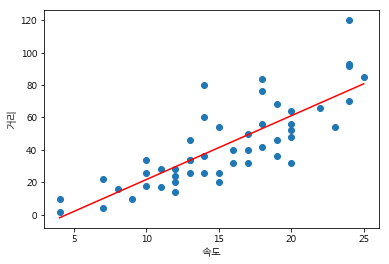

In [20]:
# 선형 회귀 분석
# =>linregress(독립변수,종속변수)
result = stats.linregress(df.speed,df.dist)
# print(result)
# y = ax + c
print('기울기(a에 해당):',result.slope)
print('절편(c에 해당):',result.intercept)
print('상관계수:',result.rvalue)
# 속도와 제동거리 연관X => 귀무가설
# 속도와 제동거리 연관O => 대립가설
# (검정)p-value => 0.1 : (귀무가설 10% // 대립가설 90%)
# (검정)p-value => 0.05 : (귀무가설 5% // 대립가설 95%)
# 0.05이하면 대개 대립가설 채택함 => 의미있는 값이라고 여겨짐
print('p-value(검정값):',result.pvalue)
print('표준편차:',result.stderr)
x = df.speed
y = df.dist
# ry = polyval([기울기,절편],x값)
ry = polyval([result.slope,result.intercept],x)
# ry = 3.93x -17.57
# print(ry)
plt.scatter(x,y)
plt.plot(x,ry,'r-')
plt.xlabel('속도')
plt.ylabel('거리')
plt.show()
sdata = 15
# predict = result.slope *sdata + result.intercept

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


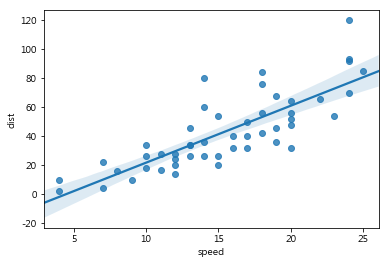

In [22]:
# regplot(x = x축 이름,y = y축이름,data = 해당데이터) 
# => 선형회귀값과 그래프를 같이 그리겠다
sns.regplot(x="speed",y='dist',data=df)
plt.show()

In [28]:
# sm.OLS.from_formula('종속변수~독립변수+독립변수',데이터)
model = sm.OLS.from_formula('dist~speed',df)
result = model.fit()
print(result.summary())
print('<------------>')
print(result.params)

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           1.49e-12
Time:                        11:43:58   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.0